In [529]:
from scipy.optimize import minimize
import scipy
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from matplotlib import cm

In [530]:
x0_center = 1.5
x1_center = 1.5

def groundtruth_function(x): # 우리가 원하는 타겟 함수 (groundtruth_function)
    z = (x[0] - x0_center)**2 + (x[1] - x1_center)**2
    return 

def function(x): # 실험을 통해 얻는 데이터 
    noise_x0 = np.random.normal(0,1)
    noise_x1 = np.random.normal(0,1)
    noise_y = np.random.normal(0,1)

    # noise_x0, noise_x1, noise_y = [0, 0, 0] # If there is no sensor noise. 

    print(noise_x0)

    y = (x[0] - x0_center - noise_x0)**2 + (x[1] - x1_center - noise_x1)**2 + noise_y
    return y

def const1(x):
    const = x[0] - 4 
    return

groundtruth_params = [-2*x0_center, -2*x1_center, x0_center**2, x1_center**2]
print(groundtruth_params)

[-3.0, -3.0, 2.25, 2.25]


In [531]:
x0_min = -10
x0_max = 10

x1_min = -10
x1_max = 10

n = 5

# Let's assume that we did 'n'-K experiment design for 2 variables.
x0 = np.linspace(x0_min,x0_max,n)
x1 = np.linspace(x1_min,x1_max,n)
X0, X1 = (np.meshgrid(x0, x1))
X0 = X0.flatten()
X1 = X1.flatten()

y0 = function([X0, X1])

d = {'x0': X1, 'x1': X0, 'y0': y0}

df = pd.DataFrame(data = d)

-1.611520827253749


In [532]:
df.head()


,x0,x1,y0
0,-10.0,-10.0,222.962333
1,-10.0,-5.0,149.077541
2,-10.0,0.0,125.192749
3,-10.0,5.0,151.307958
4,-10.0,10.0,227.423166


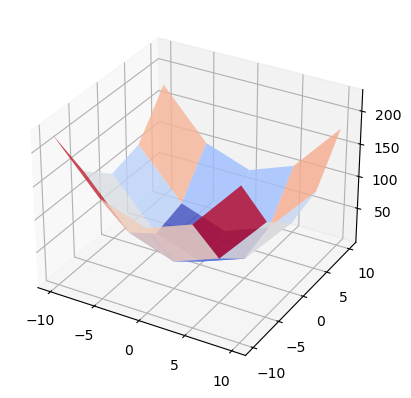

In [533]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Y0 = np.array(df.y0).reshape((n,n))

X0 = X0.reshape((n,n))
X1 = X1.reshape((n,n))
ax.plot_surface(X0, X1, Y0, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha =0.8)


In [534]:
def second_order(a, x0, x1):
    y = x0+x1+x0*a[0]+x1*a[1]+a[2]*x0**2+a[3]*x1**2
    return y

def cost_second_order(a,x0,x1,y):
    #print('hi')
    cost = np.sum((y - second_order(a,x0,x1))**2)
    #print((y - second_order(a,x0,x1))**2)
    return cost

In [535]:
init = np.ones((4,1))
cost_second_order(init, df.x0, df.x1, df.y0)

29190.718398096054

In [539]:
init = [-3.0, -3.0, 2.25, 2.25]

ans_params = minimize(cost_second_order,
               init,
               method = 'Nelder-Mead',
               args=(df.x0, df.x1, df.y0), 
               options = {'maxiter' : 1000000, 'disp': True}
               )

ans_params.x

Optimization terminated successfully.
         Current function value: 0.422653
         Iterations: 198
         Function evaluations: 339


array([-3.49372988, -0.77695011,  1.00189879,  1.0018883 ])

In [537]:
bosund = [(-10,10),(-10,10), (-10,10),(-10,10)]
ans_params = scipy.optimize.differential_evolution(cost_second_order, bounds=bound, args=(df.x0, df.x1, df.y0),tol=1e-10)
ans_params

     fun: 0.42264932862481636
     jac: array([ 5.85032026e-05, -5.22193397e-05,  1.34590673e-03,  1.27008960e-03])
 message: 'Optimization terminated successfully.'
    nfev: 5720
     nit: 94
 success: True
       x: array([-3.49373891, -0.77695837,  1.00189156,  1.00189156])

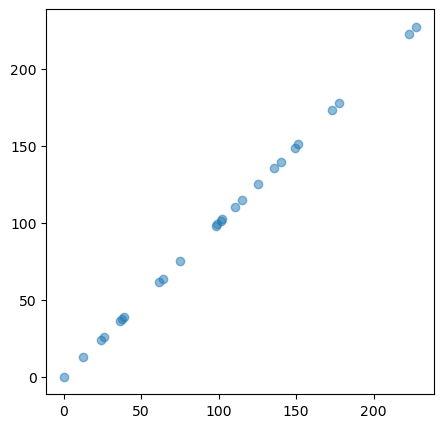

In [540]:
def developed_function(x, params = list):
    y = x[0]+x[1]+x[0]*params[0]+x[1]*params[1]+params[2]*x[0]**2+params[3]*x[1]**2
    return y

fig, ax = plt.subplots(figsize = (5,5))    
figure = ax.scatter(df.y0, developed_function([df.x0,df.x1], params = ans_params.x), alpha = 0.5)
#print(developed_function([df.x0,df.x1], params = ans_params.x))

In [541]:
init = np.zeros((2,1))
ans = minimize(developed_function,
               init,
               #bounds = ((1,4),(2.5,3)),
               args = (ans_params.x),
               tol = 1e-4
               )
ans

/var/folders/qm/rsz4z5t17sl3k3c6x1z6j80c0000gn/T/ipykernel_10664/285166755.py:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  ans = minimize(developed_function,


      fun: -1.5641401486429038
 hess_inv: array([[0.50302819, 0.04445036],
       [0.04445036, 0.99602425]])
      jac: array([-2.53319740e-07, -2.33948231e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.24450177, -0.11131592])

In [542]:
## For discrete optimization problem: 
## https://scipy-cookbook.readthedocs.io/items/discrete_bvp.html 